<a href="https://colab.research.google.com/github/hany606/LCT_Spring20IU/blob/master/Lab1_From_linear_ODE_to_State_Space.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# From linear ODE to State Space

Given an ODE:

$$a_{k}y^{(k)} +a_{k-1}y^{(k-1)}+...+a_{2}\ddot y+a_{1}\dot y + a_0 y= b_0$$

find its state space representation:

$$\dot x = Ax + b$$

In [0]:
import numpy as np

n = 7                     # degree of the polynomial 
a = np.random.rand(n)     # coefficients: [a0 a1 ... ak]
print("Our coeffitients a are:", a)
a = np.flip(a)            #to be pedantic with indicies in the notation

a_norm = a[1:] / a[0]     # divide by "ak"

A = np.zeros((n-1, n-1))  # state matrix
A[0 , 0:] = -a_norm
A[1:, 0:(n-2)] = np.eye(n-2)

print("Our matrix A:")
print(A)

Our coeffitients a are: [0.22157825 0.7051827  0.04292841 0.16478453 0.27657869 0.26516263
 0.31615622]
Our matrix A:
[[-0.83870764 -0.87481654 -0.52121237 -0.13578227 -2.23048815 -0.70085054]
 [ 1.          0.          0.          0.          0.          0.        ]
 [ 0.          1.          0.          0.          0.          0.        ]
 [ 0.          0.          1.          0.          0.          0.        ]
 [ 0.          0.          0.          1.          0.          0.        ]
 [ 0.          0.          0.          0.          1.          0.        ]]


# Solve linear ODE and its state space representation

Assume $$ b = 0 $$

In [0]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# x_dot from ODE
def LinearODE(x, t):
    dx = np.zeros(n-1)
    dx[0] = -a_norm.dot(x)
    dx[1:] = x[0:(n-2)]
    return dx

# x_dot from state space
def StateSpace(x, t):
    return A.dot(x)

time = np.linspace(0, 1, 1000)   
x0 = np.random.rand(n-1)  # initial state

solution = {"ODE": odeint(LinearODE, x0, time), "SS": odeint(StateSpace, x0, time)}


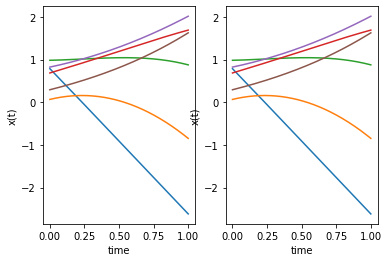

In [0]:
# ode based model
plt.subplot(121)
plt.plot(time, solution["ODE"])
plt.xlabel('time')
plt.ylabel('x(t)')

# state space based model
plt.subplot(122)
plt.plot(time, solution["SS"])
plt.xlabel('time')
plt.ylabel('x(t)')

plt.show()

In [0]:
e, v = np.linalg.eig(A)
print("eigenvalues of A:", e)

eigenvalues of A: [ 0.75289453+0.75369612j  0.75289453-0.75369612j -0.41620377+1.20842069j
 -0.41620377-1.20842069j -1.19599682+0.j         -0.31609233+0.j        ]


# Linear time variant systems

What if one of the coefficients of your ODE is changing with time? How do you model that? Consider example:

$$\begin{bmatrix} \dot x_1 \\ \dot x_2 \end{bmatrix} = 
\begin{bmatrix} 
-10 & sin(t) \\
5 & -14 
\end{bmatrix} 
\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}$$

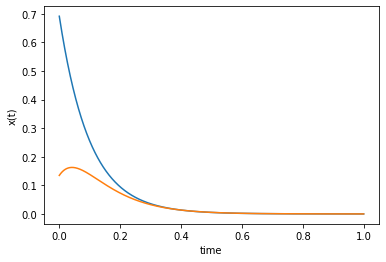

In [0]:
from math import sin

def LTV(x, t):
    A = np.array([[-10, sin(t)], [5, -14]])
    return A.dot(x)

x0 = np.random.rand(2)
solution["LTV"] = odeint(LTV, x0, time)

plt.plot(time, solution["LTV"])
plt.xlabel('time')
plt.ylabel('x(t)')
plt.show()

# Questions for you:

* Is the ODE stable? Does its solution converges or diverges?
* How can you explain it?
* How would you analyse eigenvalues of an LTV system? What does that even mean?

# Your task:

1 part(85%)
* Do the same but take $b_0$ into account.
* Write state-space model for a spring-damper system
* Make simulation

<img src="https://www.mdpi.com/entropy/entropy-17-06289/article_deploy/html/images/entropy-17-06289-g001.png" width="400">

2 part(15%)
* System from Ogata B-3-4 (Same task)

# Recomended:

Ogata 2-4,5 3-2; Strogatz 5.0-2
